In [1]:
import pandas as pd
import numpy as np
import matplotlib_inline

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

# Data Preparation:
* focus is always to understand the final data structure
* support each step by visual analytics

In [2]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181534,181574,181666,181725,181808,181912,181987,182033,182072,182149
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,277141,277141,277409,277444,277663,277940,278211,278504,278793,279077
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265968,265971,265975,265985,265993,266006,266015,266025,266030,266038
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43774,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [4]:
# As we can see the date headers start from 0,..,4th column onwards. We want date information, so stripping that information from the dataset.
time_idx=pd_raw.columns[4:]

In [5]:
df_plot=pd.DataFrame({'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [7]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [8]:
country_list=['Italy','US','Spain','Germany','Korea, South']

In [9]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

print(df_plot)

        date     Italy        US     Spain   Germany  Korea, South
0    1/22/20         0         1         0         0             1
1    1/23/20         0         1         0         0             1
2    1/24/20         0         2         0         0             2
3    1/25/20         0         2         0         0             2
4    1/26/20         0         5         0         0             3
..       ...       ...       ...       ...       ...           ...
882  6/22/22  18014202  86636306  12613634  27573585      18305783
883  6/23/22  18071634  86757621  12613634  27681775      18312993
884  6/24/22  18128044  86909716  12681820  27771111      18319773
885  6/25/22  18184917  86949088  12681820  27771112      18326019
886  6/26/22  18234242  86967639  12681820  27771911      18329448

[887 rows x 6 columns]


<AxesSubplot:xlabel='date'>

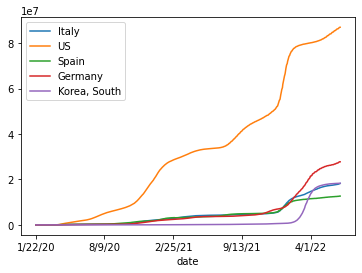

In [10]:
%matplotlib inline
df_plot.set_index('date').plot()

# Data Type Date

In [11]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [12]:
time_idx=[datetime.strptime( each, "%m/%d/%y") for each in df_plot.date]
time_str=[each.strftime('%Y-%m-%d') for each in time_idx]

In [13]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv', sep=';', index=False)

# Rational Data Model - Defining a Primary key
In the resouce model of databses, a primary key is specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: Wiki)

A primary key's main features are:
* It must contain a unique value for each row of data
* It cannot contain null values

In [15]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181534,181574,181666,181725,181808,181912,181987,182033,182072,182149
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,277141,277141,277409,277444,277663,277940,278211,278504,278793,279077
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265968,265971,265975,265985,265993,266006,266015,266025,266030,266038
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43774,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [16]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country','Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')

In [17]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,181534,181574,181666,181725,181808,181912,181987,182033,182072,182149
1,no,Albania,0,0,0,0,0,0,0,0,...,277141,277141,277409,277444,277663,277940,278211,278504,278793,279077
2,no,Algeria,0,0,0,0,0,0,0,0,...,265968,265971,265975,265985,265993,266006,266015,266025,266030,266038
3,no,Andorra,0,0,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43774,43774,43774,43774,43774
4,no,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [18]:
# Creating a test dataframe
test_pd=pd_data_base.set_index(['state', 'country'])

In [19]:
test_pd.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
state country                                                             
no    Afghanistan        0        0        0        0        0        0   
      Albania            0        0        0        0        0        0   
      Algeria            0        0        0        0        0        0   
      Andorra            0        0        0        0        0        0   
      Angola             0        0        0        0        0        0   

                   1/28/20  1/29/20  1/30/20  1/31/20  ...  6/17/22  6/18/22  \
state country                                          ...                     
no    Afghanistan        0        0        0        0  ...   181534   181574   
      Albania            0        0        0        0  ...   277141   277141   
      Algeria            0        0        0        0  ...   265968   265971   
      Andorra            0        0        0        0  ...    43449    43449   
      Angola             0        0        0        0  ...    99761    99761   

                   6/19/22  6/20/22  6/21/22  6/22/22  6/23/22  6/24/22  \
state country                                                             
no    Afghanistan   181666   181725   181808   181912   181987   182033   
      Albania       277409   277444   277663   277940   278211   278504   
      Algeria       265975   265985   265993   266006   266015   266025   
      Andorra        43449    43449    43449    43774    43774    43774   
      Angola         99761    99761    99761    99761    99761    99761   

                   6/25/22  6/26/22  
state country                        
no    Afghanistan   182072   182149  
      Albania       278793   279077  
      Algeria       266030   266038  
      Andorra        43774    43774  
      Angola         99761    99761  

[5 rows x 887 columns]

In [23]:
#test_pd.stack(level=0)

In [ ]:
# T stands for transpose, stack level 0 and 1 stacks 
# Not supposed to stack commands like this but to show that this can be done:
pd_relational_model=pd_data_base.set_index(['state','country']).T.stack(level=[0,1]).reset_index().rename(columns={'level_0':'date',0:'confirmed'})
pd_relational_model.head()

In [ ]:
pd_relational_model.dtypes

In [ ]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [ ]:
pd_relational_model.dtypes

In [ ]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [ ]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

# Attention due to the new structure of the Johns Hopkins data set the state information US is in a second file

In [ ]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()

In [ ]:
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()

In [ ]:
pd_relational_model_US=pd_data_base_US.set_index(['state']).T.stack().reset_index().rename(columns={'level_0':'date',0:'confirmed'})
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

In [ ]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [ ]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [ ]:
pd_relational_model_all.to_csv('../data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)

In [ ]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

# cross check on full sum US data

In [ ]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [ ]:
check_US[['date','country','confirmed']].groupby(['date','country']).sum()